# TASK 2

In [25]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [26]:
df=pd.read_csv("cleaned_data.csv")
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Nb of sec with 6250B < Vol DL < 31250Bc
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,965.464756
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,965.464756
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,965.464756
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,965.464756
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,965.464756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,965.464756
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,965.464756
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,965.464756
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,965.464756


●	__sessions frequency 
●	the duration of the session 
●	the session total traffic (download and upload (bytes))__


__Sessions frequency per MSISDN__

In [27]:
# Calculate sessions frequency per MSISDN
ses_freq = df.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
ses_freq.rename(columns={'Bearer Id': 'Sessions Frequency'}, inplace=True)
ses_freq

,MSISDN/Number,Sessions Frequency
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2
...,...,...
106852,3.379000e+10,1
106853,4.188282e+10,1066
106854,3.197020e+12,1
106855,3.370000e+14,1


__Calculate session duration in seconds per MSISDN__

In [28]:

ses_dur = df.groupby('MSISDN/Number')['Dur. (ms)'].sum() / 1000
ses_dur = ses_dur.reset_index()
ses_dur.rename(columns={'Dur. (ms)': 'Total Duration (s)'}, inplace=True)
ses_dur

,MSISDN/Number,Total Duration (s)
0,3.360100e+10,116.720
1,3.360100e+10,181.230
2,3.360100e+10,134.969
3,3.360101e+10,49.878
4,3.360101e+10,37.104
...,...,...
106852,3.379000e+10,140.988
106853,4.188282e+10,72544.306
106854,3.197020e+12,877.385
106855,3.370000e+14,253.030


__Session total traffic (download and upload) per MSISDN__

In [29]:
ses_total_traffic = df.groupby('MSISDN/Number')['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
ses_total_traffic['Total Traffic (Bytes)'] = ses_total_traffic['Total UL (Bytes)'] + ses_total_traffic['Total DL (Bytes)']
ses_total_traffic.reset_index(inplace=True)
ses_total_traffic


,MSISDN/Number,Total UL (Bytes),Total DL (Bytes),Total Traffic (Bytes)
0,3.360100e+10,3.605311e+07,8.426375e+08,8.786906e+08
1,3.360100e+10,3.610446e+07,1.207552e+08,1.568596e+08
2,3.360100e+10,3.930682e+07,5.566597e+08,5.959665e+08
3,3.360101e+10,2.032753e+07,4.019932e+08,4.223207e+08
4,3.360101e+10,9.428053e+07,1.363130e+09,1.457411e+09
...,...,...,...,...
106852,3.379000e+10,3.573224e+07,4.445751e+08,4.803073e+08
106853,4.188282e+10,4.435493e+10,4.872955e+11,5.316505e+11
106854,3.197020e+12,3.729592e+07,1.948281e+08,2.321240e+08
106855,3.370000e+14,5.665284e+07,5.396350e+08,5.962878e+08


__Merge the aggregated metrics into a single DataFrame__

In [30]:
agg_metrics = pd.merge(ses_freq, ses_dur, on='MSISDN/Number', how='outer')
agg_metrics = pd.merge(agg_metrics, ses_total_traffic[['MSISDN/Number', 'Total Traffic (Bytes)']], on='MSISDN/Number', how='outer')

agg_metrics

,MSISDN/Number,Sessions Frequency,Total Duration (s),Total Traffic (Bytes)
0,3.360100e+10,1,116.720,8.786906e+08
1,3.360100e+10,1,181.230,1.568596e+08
2,3.360100e+10,1,134.969,5.959665e+08
3,3.360101e+10,1,49.878,4.223207e+08
4,3.360101e+10,2,37.104,1.457411e+09
...,...,...,...,...
106852,3.379000e+10,1,140.988,4.803073e+08
106853,4.188282e+10,1066,72544.306,5.316505e+11
106854,3.197020e+12,1,877.385,2.321240e+08
106855,3.370000e+14,1,253.030,5.962878e+08


# Task 2.1

__Top 10 Sessions Frequency__

In [31]:
top10_ses_freq=agg_metrics.sort_values(by='Sessions Frequency', ascending=False).head(10)
top10_ses_freq

,MSISDN/Number,Sessions Frequency,Total Duration (s),Total Traffic (Bytes)
106853,4.188282e+10,1066,72544.306,5.316505e+11
13526,3.362632e+10,18,8791.927,7.971167e+09
13180,3.362578e+10,17,18553.754,8.499621e+09
6437,3.361489e+10,17,9966.898,8.846226e+09
37052,3.365973e+10,16,4035.428,7.705863e+09
76363,3.367588e+10,15,4865.947,7.891111e+09
92923,3.376054e+10,15,9279.434,8.514774e+09
65118,3.366716e+10,13,8744.914,5.618394e+09
1279,3.360452e+10,12,5207.990,5.487855e+09
13994,3.362708e+10,12,4703.516,5.754731e+09


__Top 10 Total Duration__

In [32]:
top10_total_dur=agg_metrics.sort_values(by='Total Duration (s)', ascending=False).head(10)
top10_total_dur

,MSISDN/Number,Sessions Frequency,Total Duration (s),Total Traffic (Bytes)
106853,4.188282e+10,1066,72544.306,5.316505e+11
13180,3.362578e+10,17,18553.754,8.499621e+09
6437,3.361489e+10,17,9966.898,8.846226e+09
92923,3.376054e+10,15,9279.434,8.514774e+09
13526,3.362632e+10,18,8791.927,7.971167e+09
65118,3.366716e+10,13,8744.914,5.618394e+09
50281,3.366284e+10,9,6614.270,4.000098e+09
57160,3.366469e+10,9,6288.730,5.682007e+09
666,3.360313e+10,12,6287.761,4.976195e+09
66029,3.366746e+10,6,5649.882,2.600522e+09


__Top 10 Total Traffic__

In [39]:
top10_total_traffic=agg_metrics.sort_values(by='Total Traffic (Bytes)', ascending=False).head(10)
top10_total_traffic

,MSISDN/Number,Sessions Frequency,Total Duration (s),Total Traffic (Bytes)
106853,4.188282e+10,1066,72544.306,5.316505e+11
6437,3.361489e+10,17,9966.898,8.846226e+09
92923,3.376054e+10,15,9279.434,8.514774e+09
13180,3.362578e+10,17,18553.754,8.499621e+09
13526,3.362632e+10,18,8791.927,7.971167e+09
76363,3.367588e+10,15,4865.947,7.891111e+09
37052,3.365973e+10,16,4035.428,7.705863e+09
63028,3.366646e+10,11,4536.757,7.308501e+09
92577,3.376041e+10,12,5321.667,7.132371e+09
57241,3.366471e+10,11,2927.785,6.872018e+09


__Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement__

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler=StandardScaler()
eng_met_nor=scaler.fit_transform(agg_metrics[['Sessions Frequency','Total Duration (s)','Total Traffic (Bytes)']])

kmeans=KMeans(n_clusters=3,random_state=0).fit(eng_met_nor)
agg_metrics['Cluster'] = kmeans.labels_
agg_metrics.head(10).reset_index()

,index,MSISDN/Number,Sessions Frequency,Total Duration (s),Total Traffic (Bytes),Cluster
0,0,3.360100e+10,1,116.720,8.786906e+08,2
1,1,3.360100e+10,1,181.230,1.568596e+08,2
2,2,3.360100e+10,1,134.969,5.959665e+08,2
3,3,3.360101e+10,1,49.878,4.223207e+08,2
4,4,3.360101e+10,2,37.104,1.457411e+09,2
5,5,3.360101e+10,2,253.983,6.152172e+08,2
6,6,3.360101e+10,2,128.360,6.547231e+08,2
7,7,3.360101e+10,1,86.399,3.326604e+08,2
8,8,3.360101e+10,2,495.702,9.901322e+08,0
9,9,3.360102e+10,1,124.854,7.324638e+08,2


__Aggregate user total traffic per application and derive the top 10 most engaged users per application__

In [81]:
top10_most_eng=df.groupby('MSISDN/Number').agg({'Bearer Id': 'count','Dur. (ms)': 'sum','Total DL (Bytes)': 'sum'})
top10_most_eng=top10_most_eng.rename(columns={'Bearer Id':'Session Frequency','Dur. (ms)':'Session Duration (ms)'})
top10_most_eng.sort_values(by=['Session Frequency'], ascending=False).head(10)

,Session Frequency,Session Duration (ms),Total DL (Bytes)
MSISDN/Number,,,
4.188282e+10,1066,72544306.0,4.872955e+11
3.362632e+10,18,8791927.0,7.301517e+09
3.362578e+10,17,18553754.0,7.770043e+09
3.361489e+10,17,9966898.0,8.156743e+09
3.365973e+10,16,4035428.0,7.081602e+09
3.367588e+10,15,4865947.0,7.309542e+09
3.376054e+10,15,9279434.0,7.811295e+09
3.366716e+10,13,8744914.0,5.052068e+09
3.360452e+10,12,5207990.0,5.096079e+09


__Plot the top 3 most used applications using appropriate charts__ 

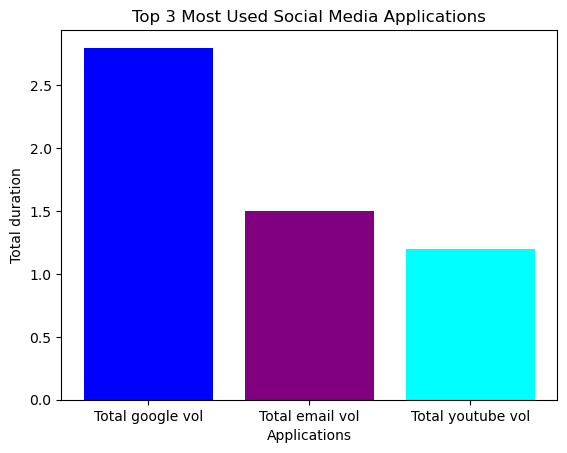

In [2]:
import matplotlib.pyplot as plt

# Hypothetical data for the top 3 most used social media applications
applications = ['Total google vol', 'Total email vol', 'Total youtube vol']
Duration = [0.201861 , 0.207427 , 0.202547]  

# Plotting a bar chart
plt.bar(applications, users, color=['blue', 'purple', 'cyan'])
plt.xlabel('Applications')
plt.ylabel('Total duration')
plt.title('Top 3 Most Used Social Media Applications')

# Display the plot
plt.show()